# Analyzing IPL Cricket Players Statistics for Nationality Prediction

#### Objectives:
* Analyze batting performance metrics like runs scored, strike rate, batting average etc. across players.
* Analyze bowling performance metrics like wickets taken, economy rate, bowling average etc. across players.
* To Compare batting and bowling metrics between Indian and Overseas players.
* Predicting the Nationality of a player based on their overall performance attributes.

In [2]:
## Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from scipy.stats import shapiro

### Importing data

In [3]:
df = pd.read_csv("C:\\Users\\divak\\OneDrive\\Desktop\\My Projects\\Ipl Performance\\IPL Player Stat.csv")
df

,player,runs,boundaries,balls_faced,wickets,balls_bowled,runs_conceded,matches,batting_avg,batting_strike_rate,boundaries_percent,bowling_economy,bowling_avg,bowling_strike_rate,catches,Nationality
0,A Ashish Reddy,280,31,196,18,270,400,28,10.00,142.86,15.82,8.89,22.22,15.00,8,Indian
1,A Badoni,161,18,139,2,12,12,11,14.64,115.83,12.95,6.00,6.00,6.00,8,Indian
2,A Chandila,4,0,7,11,234,245,12,0.33,57.14,0.00,6.28,22.27,21.27,2,Overseas
3,A Chopra,53,7,75,0,0,0,6,8.83,70.67,9.33,0.00,0.00,0.00,2,Indian
4,A Choudhary,25,2,20,5,108,144,5,5.00,125.00,10.00,8.00,28.80,21.60,0,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Yash Dayal,0,0,1,11,205,296,9,0.00,0.00,0.00,8.66,26.91,18.64,1,Indian
601,Yashpal Singh,47,5,67,0,0,0,4,11.75,70.15,7.46,0.00,0.00,0.00,3,Indian
602,Younis Khan,3,0,7,0,0,0,1,3.00,42.86,0.00,0.00,0.00,0.00,1,Overseas
603,Yuvraj Singh,2754,367,2207,36,882,1091,129,21.35,124.78,16.63,7.42,30.31,24.50,29,Indian


### Understanding the data

In [4]:
df.head()

,player,runs,boundaries,balls_faced,wickets,balls_bowled,runs_conceded,matches,batting_avg,batting_strike_rate,boundaries_percent,bowling_economy,bowling_avg,bowling_strike_rate,catches,Nationality
0,A Ashish Reddy,280,31,196,18,270,400,28,10.00,142.86,15.82,8.89,22.22,15.00,8,Indian
1,A Badoni,161,18,139,2,12,12,11,14.64,115.83,12.95,6.00,6.00,6.00,8,Indian
2,A Chandila,4,0,7,11,234,245,12,0.33,57.14,0.00,6.28,22.27,21.27,2,Overseas
3,A Chopra,53,7,75,0,0,0,6,8.83,70.67,9.33,0.00,0.00,0.00,2,Indian
4,A Choudhary,25,2,20,5,108,144,5,5.00,125.00,10.00,8.00,28.80,21.60,0,Indian


In [5]:
num_rows,num_cols = df.shape
print("Number of rows:",num_rows)
print("Number of columns:",num_cols)

Number of rows: 605
Number of columns: 16


In [6]:
total_elements = df.size
print("Total number of elements in the DataFrame:", total_elements)

Total number of elements in the DataFrame: 9680


In [7]:
df.describe()

,runs,boundaries,balls_faced,wickets,balls_bowled,runs_conceded,matches,batting_avg,batting_strike_rate,boundaries_percent,bowling_economy,bowling_avg,bowling_strike_rate,catches
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,464.428099,59.778512,373.266116,16.532231,368.801653,482.558678,32.869421,10.180380,100.663719,11.804579,6.059554,28666.014132,17288.203074,11.257851
std,985.272855,129.559738,764.514719,30.365560,650.764782,823.838933,42.215050,9.525055,39.956245,8.375952,4.448823,115955.201006,73932.543578,18.529008
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.000000,18.000000,0.000000,0.000000,0.000000,6.000000,1.500000,78.750000,7.140000,0.000000,0.000000,0.000000,1.000000
50%,73.000000,8.000000,73.000000,3.000000,88.000000,125.000000,14.000000,7.630000,107.270000,12.500000,7.680000,27.740000,20.860000,4.000000
75%,326.000000,39.000000,285.000000,17.000000,372.000000,521.000000,43.000000,16.500000,125.000000,16.270000,8.580000,38.250000,28.000000,13.000000
max,6634.000000,838.000000,5266.000000,183.000000,4024.000000,4596.000000,221.000000,39.340000,400.000000,100.000000,36.000000,940000.000000,670000.000000,135.000000


## Exploratory data analysis

### Data Cleaning

In [8]:
df.isnull().sum()

player                 0
runs                   0
boundaries             0
balls_faced            0
wickets                0
balls_bowled           0
runs_conceded          0
matches                0
batting_avg            0
batting_strike_rate    0
boundaries_percent     0
bowling_economy        0
bowling_avg            0
bowling_strike_rate    0
catches                0
Nationality            0
dtype: int64

In [9]:
column_names = df.columns.tolist()
print(column_names)

['player', 'runs', 'boundaries', 'balls_faced', 'wickets', 'balls_bowled', 'runs_conceded', 'matches', 'batting_avg', 'batting_strike_rate', 'boundaries_percent', 'bowling_economy', 'bowling_avg', 'bowling_strike_rate', 'catches', 'Nationality']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               605 non-null    object 
 1   runs                 605 non-null    int64  
 2   boundaries           605 non-null    int64  
 3   balls_faced          605 non-null    int64  
 4   wickets              605 non-null    int64  
 5   balls_bowled         605 non-null    int64  
 6   runs_conceded        605 non-null    int64  
 7   matches              605 non-null    int64  
 8   batting_avg          605 non-null    float64
 9   batting_strike_rate  605 non-null    float64
 10  boundaries_percent   605 non-null    float64
 11  bowling_economy      605 non-null    float64
 12  bowling_avg          605 non-null    float64
 13  bowling_strike_rate  605 non-null    float64
 14  catches              605 non-null    int64  
 15  Nationality          605 non-null    obj

In [12]:
object_column_names = df.dtypes[df.dtypes.values == 'object'].index.tolist()
print(object_column_names)
numerical_column_names = df.dtypes[df.dtypes.values != 'object'].index.tolist()
print(numerical_column_names)

['player', 'Nationality']
['runs', 'boundaries', 'balls_faced', 'wickets', 'balls_bowled', 'runs_conceded', 'matches', 'batting_avg', 'batting_strike_rate', 'boundaries_percent', 'bowling_economy', 'bowling_avg', 'bowling_strike_rate', 'catches']


In [13]:
print("Maximum number of Matches played by an individual player :", df["matches"].max())

Maximum number of Matches played by an individual player : 221


In [14]:
# Sort batting_data by runs scored in descending order
top_batters = df.sort_values(by='runs', ascending=False).head(10)

# Display the top 10 batters
print("Top 10 Batters:")
print(top_batters[['player', 'runs']])


Top 10 Batters:
             player  runs
569         V Kohli  6634
462        S Dhawan  6244
130       DA Warner  5883
430       RG Sharma  5881
493        SK Raina  5536
27   AB de Villiers  5181
108        CH Gayle  4997
339        MS Dhoni  4978
452      RV Uthappa  4954
256      KD Karthik  4377


In [15]:
# Sort batting_data by batting strike rate in descending order
top_strikerates = df.sort_values(by='batting_strike_rate', ascending=False).head(10)

# Display the top 10 highest strike rates
print("Top 10 Highest Strike Rates:")
print(top_strikerates[['player', 'batting_strike_rate']])


Top 10 Highest Strike Rates:
            player  batting_strike_rate
393      PN Mankad               400.00
83      B Stanlake               250.00
567       Umar Gul               205.26
448       RS Sodhi               200.00
551       TH David               198.94
526  Shahid Afridi               176.09
560   TU Deshpande               175.00
200     I Malhotra               175.00
287      LJ Wright               168.25
36      AD Russell               168.23


In [16]:
# Sort batting_data by batting average in descending order
top_batting_averages = df.sort_values(by='batting_avg', ascending=False).head(10)

# Display the top 10 highest batting averages
print("Top 10 Batting Averages:")
print(top_batting_averages[['player', 'batting_avg']])


Top 10 Batting Averages:
          player  batting_avg
263     KL Rahul        39.34
288  LMP Simmons        37.21
436   RM Patidar        36.73
130    DA Warner        36.31
490     SE Marsh        36.07
192      HM Amla        36.06
152    DP Conway        36.00
108     CH Gayle        35.44
219   JC Buttler        34.96
330    ML Hayden        34.59


In [17]:
# Sort batting_data by boundaries (sixes) in descending order
top_boundaries_hitters = df.sort_values(by='boundaries', ascending=False).head(10)

# Display the top 10 players with most number of sixes
print("Top 10 Players with Most Number of Boundaries:")
print(top_boundaries_hitters[['player', 'boundaries']])


Top 10 Players with Most Number of Boundaries:
             player  boundaries
462        S Dhawan         838
569         V Kohli         800
130       DA Warner         793
108        CH Gayle         767
430       RG Sharma         760
493        SK Raina         710
27   AB de Villiers         667
452      RV Uthappa         663
339        MS Dhoni         575
511       SR Watson         567


In [18]:
# Sort bowling_data by wickets taken in descending order
top_wicket_takers = df.sort_values(by='wickets', ascending=False).head(10)

# Display the top 10 players with the highest number of wickets taken
print("Top 10 Highest Wicket Takers:")
print(top_wicket_takers[['player','wickets']])


Top 10 Highest Wicket Takers:
              player  wickets
136         DJ Bravo      183
496       SL Malinga      170
9           A Mishra      166
598        YS Chahal      166
394        PP Chawla      157
405         R Ashwin      157
79           B Kumar      154
508        SP Narine      152
195  Harbhajan Singh      150
227        JJ Bumrah      148


In [19]:
matches_played = df.groupby('player')['matches'].sum().head(10)
print(matches_played.sort_values(ascending=False))

player
A Mishra          154
A Kumble           42
A Ashish Reddy     28
A Chandila         12
A Badoni           11
A Manohar           7
A Chopra            6
A Choudhary         5
A Flintoff          3
A Dananjaya         1
Name: matches, dtype: int64


In [20]:
# Sort data by catches in descending order and select top 5 players
top_catchers = df.sort_values(by='catches', ascending=False).head(5)

# Display the top 5 players with the highest number of catches
print("Top 5 Players with the Highest Number of Catches:")
print(top_catchers[['player', 'catches']])


Top 5 Players with the Highest Number of Catches:
             player  catches
339        MS Dhoni      135
256      KD Karthik      133
27   AB de Villiers      120
493        SK Raina      106
251      KA Pollard       97


## Data Visualization

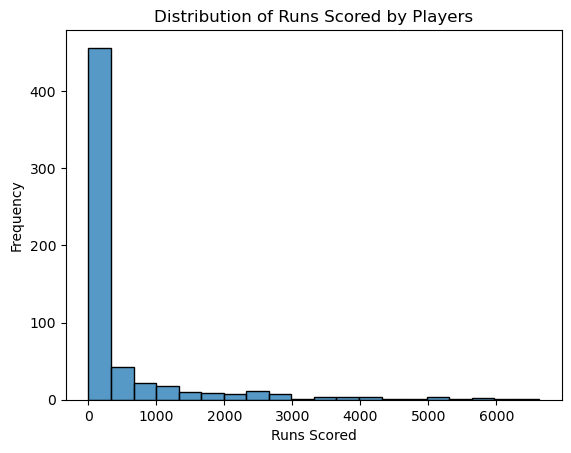

In [23]:
# Distribution of runs
sns.histplot(df["runs"], bins=20)
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.title("Distribution of Runs Scored by Players")
plt.show()


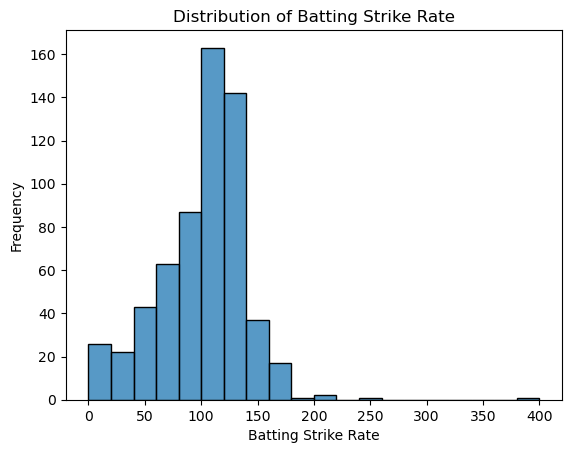

In [24]:
# Analyze batting strike rate distribution
sns.histplot(df["batting_strike_rate"], bins=20)
plt.xlabel("Batting Strike Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Batting Strike Rate")
plt.show()


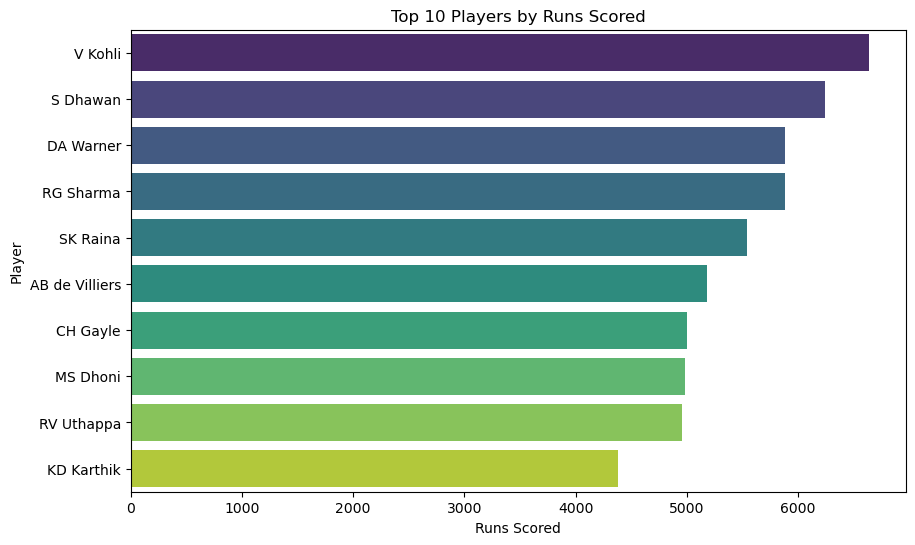

In [21]:
# Sort batting_data by runs scored in descending order and select top 10 players
top_runs = df.sort_values(by='runs', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='runs', y='player', data=top_runs, palette='viridis')
plt.xlabel('Runs Scored')
plt.ylabel('Player')
plt.title('Top 10 Players by Runs Scored')
plt.show()

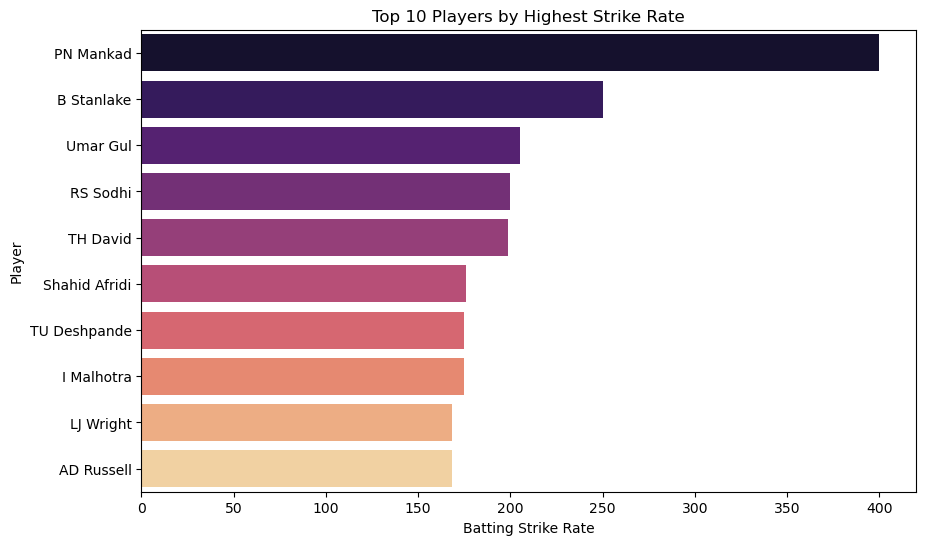

In [25]:
# Sort batting_data by batting strike rate in descending order and select top 10 players
top_strike_rate = df.sort_values(by='batting_strike_rate', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_strike_rate', y='player', data=top_strike_rate, palette='magma')
plt.xlabel('Batting Strike Rate')
plt.ylabel('Player')
plt.title('Top 10 Players by Highest Strike Rate')
plt.show()

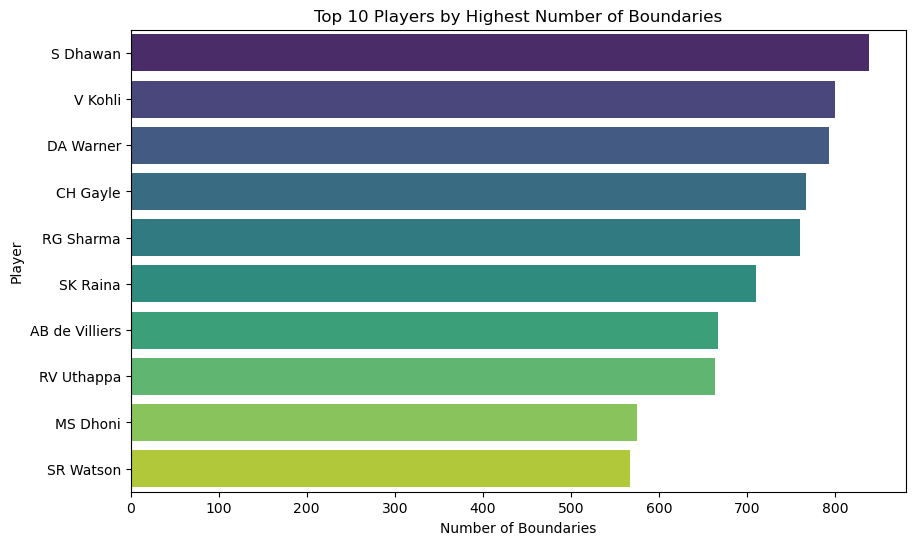

In [27]:
# Sort batting_data by boundaries (sixes) in descending order and select top 10 players
top_boundaries = df.sort_values(by='boundaries', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='boundaries', y='player', data=top_boundaries, palette='viridis')
plt.xlabel('Number of Boundaries')
plt.ylabel('Player')
plt.title('Top 10 Players by Highest Number of Boundaries')
plt.show()


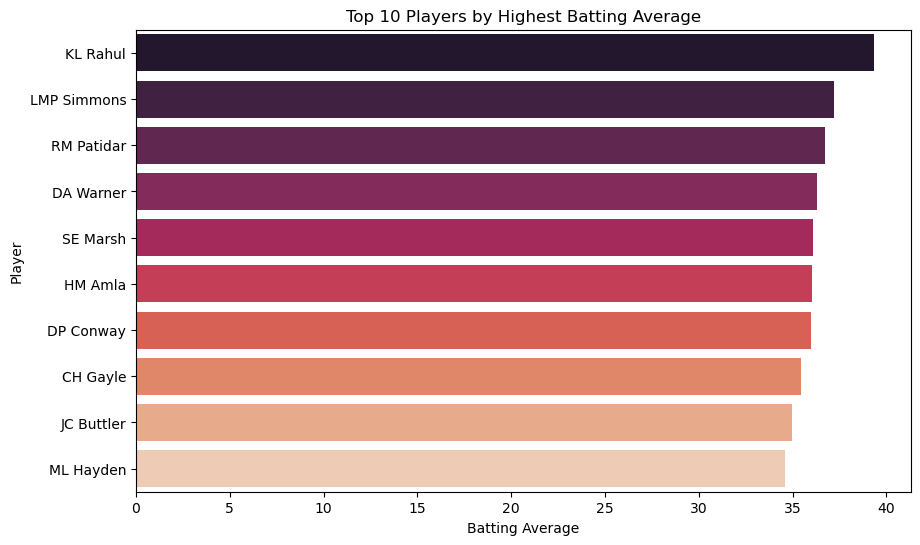

In [28]:
# Sort batting_data by batting average in descending order and select top 10 players
top_average = df.sort_values(by='batting_avg', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_avg', y='player', data=top_average, palette='rocket')
plt.xlabel('Batting Average')
plt.ylabel('Player')
plt.title('Top 10 Players by Highest Batting Average')
plt.show()


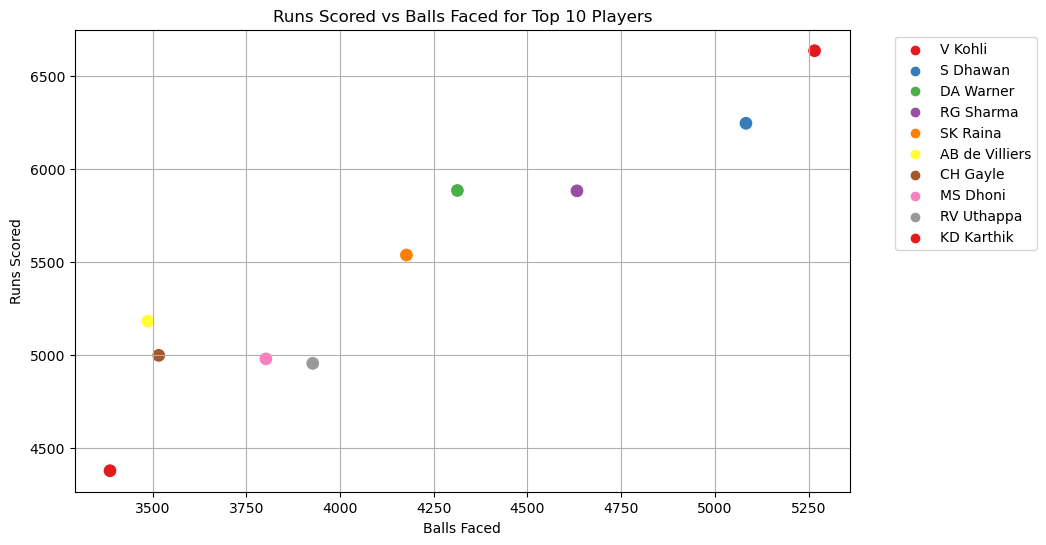

In [29]:
# Sort batting_data by runs in descending order and select top 10 players
top_players = df.sort_values(by='runs', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balls_faced', y='runs', data=top_players, hue='player', palette='Set1', s=100)
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.title('Runs Scored vs Balls Faced for Top 10 Players')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


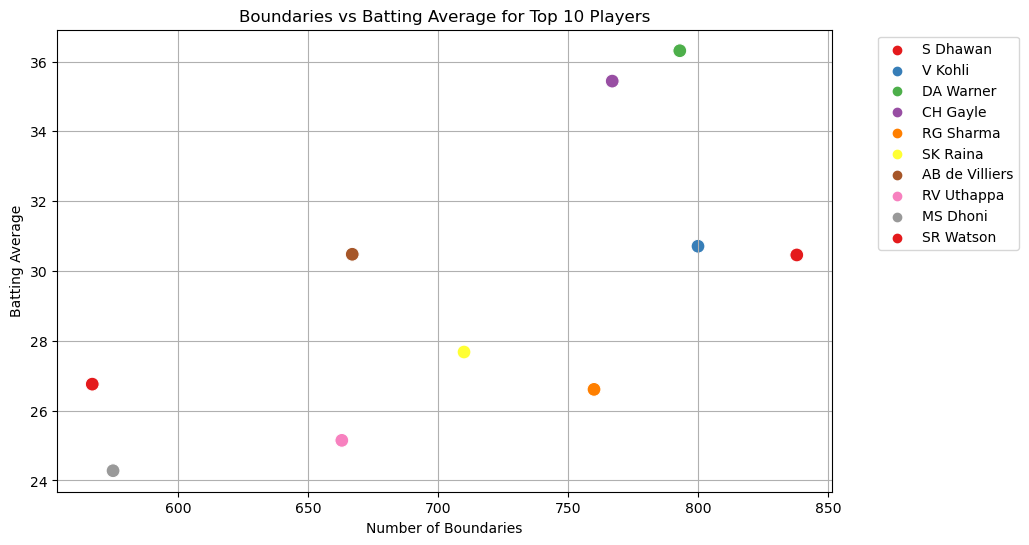

In [26]:
# Sort batting_data by boundaries in descending order and select top 10 players
top_players = df.sort_values(by='boundaries', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='boundaries', y='batting_avg', data=top_players, hue='player', palette='Set1', s=100)
plt.xlabel('Number of Boundaries')
plt.ylabel('Batting Average')
plt.title('Boundaries vs Batting Average for Top 10 Players')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


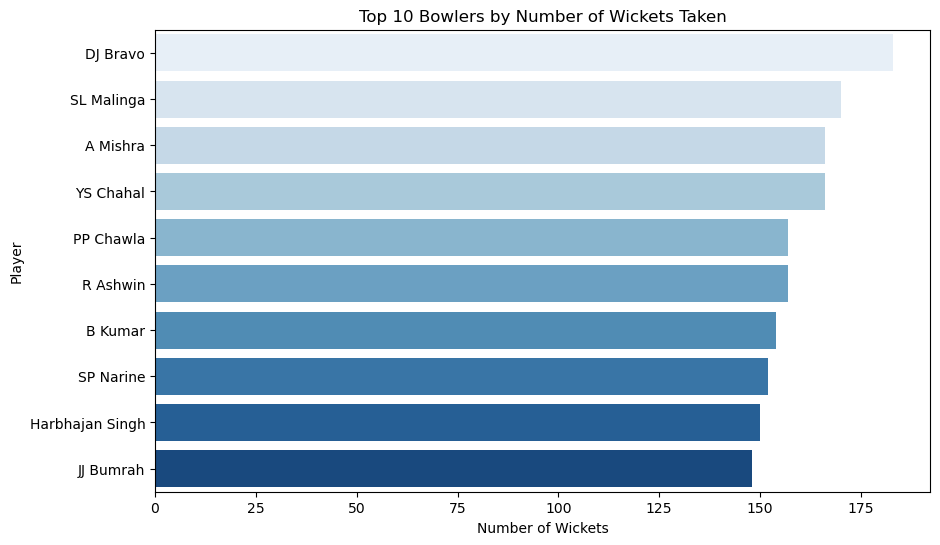

In [30]:
# Sort bowling_data by wickets taken in descending order and select top 10 players
top_wicket_takers = df.sort_values(by='wickets', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='wickets', y='player', data=top_wicket_takers, palette='Blues')
plt.xlabel('Number of Wickets')
plt.ylabel('Player')
plt.title('Top 10 Bowlers by Number of Wickets Taken')
plt.show()


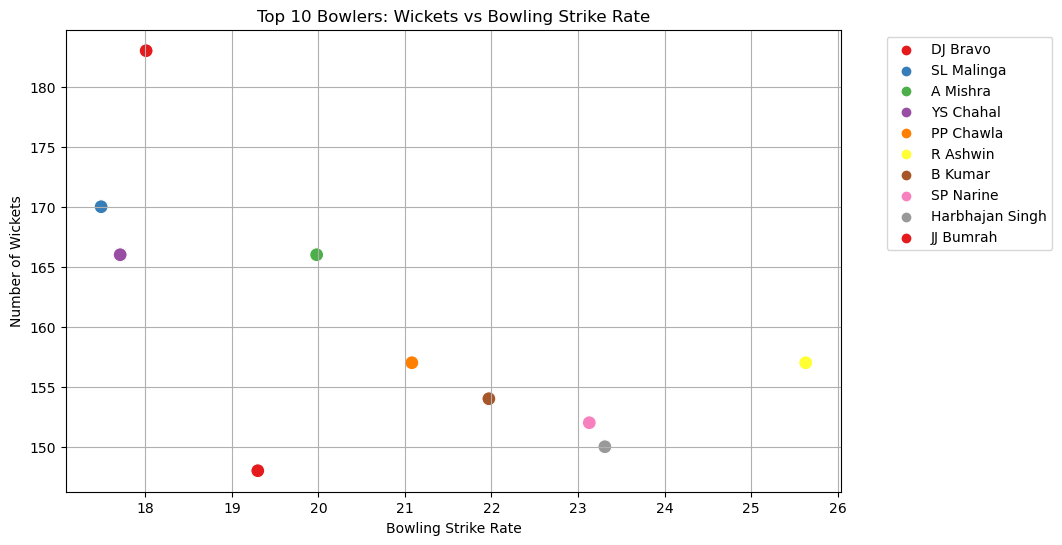

In [31]:
# Sort bowling_data by wickets taken in descending order and select top 10 players
top_wicket_takers = df.sort_values(by='wickets', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bowling_strike_rate', y='wickets', data=top_wicket_takers, hue='player', palette='Set1', s=100)
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Bowlers: Wickets vs Bowling Strike Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [32]:
# Correlation heatmap
df.corr()

,runs,boundaries,balls_faced,wickets,balls_bowled,runs_conceded,matches,batting_avg,batting_strike_rate,boundaries_percent,bowling_economy,bowling_avg,bowling_strike_rate,catches
runs,1.000000,0.995487,0.996637,0.000615,0.021963,0.020373,0.794865,0.637994,0.301513,0.256730,-0.103160,-0.021833,-0.016065,0.882713
boundaries,0.995487,1.000000,0.988899,-0.004918,0.014914,0.013215,0.781909,0.643909,0.305691,0.270476,-0.107161,-0.023186,-0.017684,0.861013
balls_faced,0.996637,0.988899,1.000000,0.000836,0.022914,0.020911,0.798260,0.637428,0.290224,0.245547,-0.106435,-0.017659,-0.011250,0.880965
wickets,0.000615,-0.004918,0.000836,1.000000,0.984346,0.983520,0.562336,-0.286431,0.007181,-0.025581,0.218400,-0.134681,-0.127358,0.208100
balls_bowled,0.021963,0.014914,0.022914,0.984346,1.000000,0.996261,0.584883,-0.277518,0.014117,-0.022985,0.228596,-0.128487,-0.120579,0.226818
runs_conceded,0.020373,0.013215,0.020911,0.983520,0.996261,1.000000,0.581488,-0.283281,0.013341,-0.025622,0.245687,-0.129954,-0.122518,0.227144
matches,0.794865,0.781909,0.798260,0.562336,0.584883,0.581488,1.000000,0.323327,0.237683,0.179046,0.023700,-0.092352,-0.081811,0.867922
batting_avg,0.637994,0.643909,0.637428,-0.286431,-0.277518,-0.283281,0.323327,1.000000,0.500891,0.442995,-0.310727,0.022511,0.030430,0.469754
batting_strike_rate,0.301513,0.305691,0.290224,0.007181,0.014117,0.013341,0.237683,0.500891,1.000000,0.876844,-0.090519,-0.024276,-0.005850,0.278238
boundaries_percent,0.256730,0.270476,0.245547,-0.025581,-0.022985,-0.025622,0.179046,0.442995,0.876844,1.000000,-0.154806,-0.067353,-0.054724,0.212169


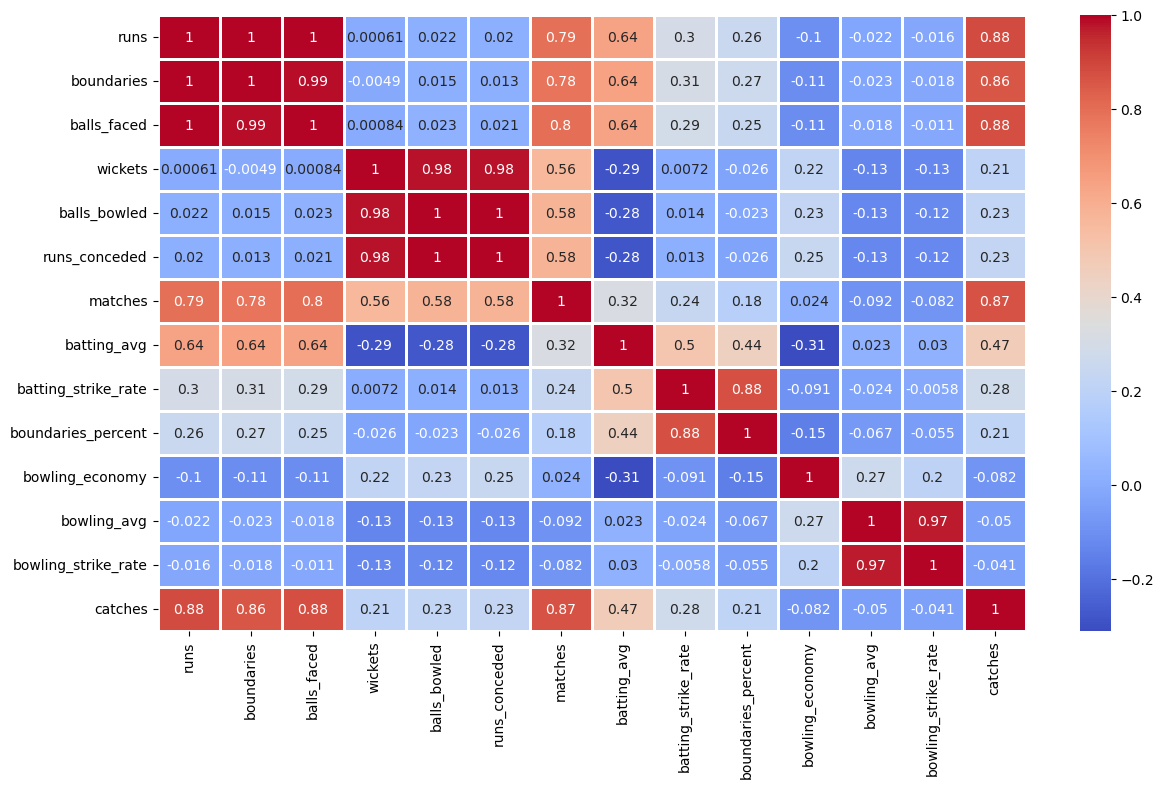

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.0)
plt.show()

### Normality Checking 

In [34]:
df.skew()

runs                   3.334781
boundaries             3.326318
balls_faced            3.298235
wickets                2.806023
balls_bowled           2.701166
runs_conceded          2.540945
matches                2.030621
batting_avg            0.804398
batting_strike_rate    0.145193
boundaries_percent     2.199321
bowling_economy        0.326753
bowling_avg            4.846584
bowling_strike_rate    5.475645
catches                3.274379
dtype: float64

In [35]:
# selecting columns to transform
columns_to_transform = ['runs', 'boundaries', 'balls_faced', 'wickets', 'balls_bowled', 'runs_conceded', 'matches', 
                        'batting_avg', 'batting_strike_rate', 'boundaries_percent', 'bowling_economy', 'bowling_avg', 
                        'bowling_strike_rate', 'catches']
# Perform power transformation
pt = PowerTransformer(method='yeo-johnson',standardize = True)
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])
df

,player,runs,boundaries,balls_faced,wickets,balls_bowled,runs_conceded,matches,batting_avg,batting_strike_rate,boundaries_percent,bowling_economy,bowling_avg,bowling_strike_rate,catches,Nationality
0,A Ashish Reddy,0.629342,0.652388,0.528187,0.911425,0.641177,0.668415,0.473596,0.354689,1.053492,0.576999,0.672172,0.237922,0.192337,0.434995,Indian
1,A Badoni,0.371366,0.393164,0.351795,-0.205752,-0.501952,-0.591413,-0.243030,0.726292,0.382977,0.271053,0.102537,-0.270684,-0.187111,0.434995,Indian
2,A Chandila,-1.254998,-1.441767,-1.212645,0.671071,0.581966,0.464527,-0.176736,-1.426860,-1.086315,-1.738745,0.160418,0.238747,0.328785,-0.491974,Overseas
3,A Chopra,-0.142861,-0.076702,0.030971,-1.098546,-1.296234,-1.311588,-0.696295,0.241029,-0.745498,-0.152062,-1.438069,-1.341275,-1.342445,-0.491974,Indian
4,A Choudhary,-0.484700,-0.675832,-0.667454,0.263410,0.272729,0.253738,-0.828148,-0.230511,0.610798,-0.069917,0.502736,0.331765,0.334666,-1.549650,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Yash Dayal,-2.005922,-1.441767,-2.028891,0.671071,0.527771,0.542090,-0.395011,-1.617664,-2.559132,-1.738745,0.628832,0.307490,0.277892,-0.866186,Indian
601,Yashpal Singh,-0.197963,-0.244764,-0.028185,-1.098546,-1.296234,-1.311588,-0.985391,0.507593,-0.758568,-0.392950,-1.438069,-1.341275,-1.342445,-0.237301,Indian
602,Younis Khan,-1.359173,-1.441767,-1.212645,-1.098546,-1.296234,-1.311588,-1.797314,-0.586423,-1.447951,-1.738745,-1.438069,-1.341275,-1.342445,-0.866186,Overseas
603,Yuvraj Singh,1.699916,1.662393,1.717468,1.222546,1.155097,1.115259,1.622947,1.129161,0.605337,0.659624,0.389656,0.349906,0.382340,1.319840,Indian


In [36]:
df.skew()

runs                  -0.000431
boundaries             0.089269
balls_faced            0.016177
wickets                0.162219
balls_bowled          -0.090185
runs_conceded         -0.121021
matches                0.018969
batting_avg           -0.090570
batting_strike_rate    0.061802
boundaries_percent    -0.028607
bowling_economy       -0.314755
bowling_avg            0.079296
bowling_strike_rate    0.086833
catches                0.042412
dtype: float64

## Performing Jarque Bera Test

In [37]:
## selecting sample size to perform shapiro test
df1 = df.sample(30)

In [38]:
## Jarque Bera Test
from scipy.stats import jarque_bera
for col in numerical_column_names:

    # Jarque-Bera test 
    stat, p_val = jarque_bera(df1[col]) 
    
    print(f'Column: {col}')
    print(f' Jarque-Bera Statistic: {round(stat, 3)}') 
    print(f' p-value: {round(p_val, 3)}')
    print('-'*20)

Column: runs
 Jarque-Bera Statistic: 2.044
 p-value: 0.36
--------------------
Column: boundaries
 Jarque-Bera Statistic: 1.87
 p-value: 0.393
--------------------
Column: balls_faced
 Jarque-Bera Statistic: 1.486
 p-value: 0.476
--------------------
Column: wickets
 Jarque-Bera Statistic: 3.452
 p-value: 0.178
--------------------
Column: balls_bowled
 Jarque-Bera Statistic: 2.948
 p-value: 0.229
--------------------
Column: runs_conceded
 Jarque-Bera Statistic: 2.794
 p-value: 0.247
--------------------
Column: matches
 Jarque-Bera Statistic: 4.285
 p-value: 0.117
--------------------
Column: batting_avg
 Jarque-Bera Statistic: 2.854
 p-value: 0.24
--------------------
Column: batting_strike_rate
 Jarque-Bera Statistic: 6.989
 p-value: 0.03
--------------------
Column: boundaries_percent
 Jarque-Bera Statistic: 7.222
 p-value: 0.027
--------------------
Column: bowling_economy
 Jarque-Bera Statistic: 1.451
 p-value: 0.484
--------------------
Column: bowling_avg
 Jarque-Bera Statisti

### Applying Statistical Tests

### Two-sample tests

In [39]:
from scipy import stats

# Two-sample t-test
for column in numerical_column_names:
    # Split the column into two random samples
    sample1 = df[column].sample(frac=0.5)
    sample2 = df[column].drop(sample1.index)
    
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)
    print(f"Two-sample t-test for {column}:\n t-statistic: {t_statistic}, p-value: {p_value}")

Two-sample t-test for runs:
 t-statistic: -0.17204992617576723, p-value: 0.863456004068766
Two-sample t-test for boundaries:
 t-statistic: -1.136753586091218, p-value: 0.25609284626130285
Two-sample t-test for balls_faced:
 t-statistic: 0.3345326619636072, p-value: 0.7380939731499458
Two-sample t-test for wickets:
 t-statistic: 1.3109246160345907, p-value: 0.19038224739349816
Two-sample t-test for balls_bowled:
 t-statistic: 0.7381586020100688, p-value: 0.46070525045619126
Two-sample t-test for runs_conceded:
 t-statistic: -0.04957317913958276, p-value: 0.9604789356914515
Two-sample t-test for matches:
 t-statistic: -0.634995953534192, p-value: 0.5256719191653447
Two-sample t-test for batting_avg:
 t-statistic: -1.615936964938639, p-value: 0.10663097920403145
Two-sample t-test for batting_strike_rate:
 t-statistic: 0.955621813767943, p-value: 0.33964628125139196
Two-sample t-test for boundaries_percent:
 t-statistic: 0.3964163706608706, p-value: 0.6919381325412972
Two-sample t-test for

### Analyze batting performance metrics like runs scored, strike rate, batting average etc. across players.

In [40]:

# Calculate total runs scored by each player
total_runs = df.groupby('player')['runs'].sum()

# Calculate total balls faced by each player
total_balls_faced = df.groupby('player')['balls_faced'].sum()

# Calculate total number of innings played by each player
total_innings = df.groupby('player')['matches'].count()

# Calculate batting average for each player
batting_average = total_runs / total_innings

# Calculate strike rate for each player
strike_rate = (total_runs / total_balls_faced) * 100

# Sort the players based on runs scored in descending order
sorted_players = total_runs.sort_values(ascending=False)

# Print the analysis results
print('Batting Performance Metrics:')
print('---------------------------')
print('{:<20} {:<10} {:<10} {:<10} {:<10}'.format('Player', 'Runs', 'Innings', 'Average', 'Strike Rate'))
print('----------------------------------------------------')
for player in sorted_players.index:
    print('{:<20} {:<10} {:<10} {:<10.2f} {:<10.2f}'.format(player, total_runs[player], total_innings[player], batting_average[player], strike_rate[player]))

Batting Performance Metrics:
---------------------------
Player               Runs       Innings    Average    Strike Rate
----------------------------------------------------
V Kohli              2.1126722951915893 1          2.11       99.60     
S Dhawan             2.0842147526655137 1          2.08       99.01     
DA Warner            2.056244008918249 1          2.06       101.31    
RG Sharma            2.056084316781758 1          2.06       99.69     
SK Raina             2.027692428130123 1          2.03       100.64    
AB de Villiers       1.996569501243537 1          2.00       103.38    
CH Gayle             1.9795891848514944 1          1.98       102.30    
MS Dhoni             1.9778003298040203 1          1.98       100.33    
RV Uthappa           1.9755309492966846 1          1.98       99.46     
KD Karthik           1.9173870391648786 1          1.92       99.98     
G Gambhir            1.8999031023843225 1          1.90       98.12     
AT Rayudu            1.89

### Analyze bowling performance metrics like wickets taken, economy rate, bowling average etc. across players.

In [40]:
import pandas as pd

# Calculate total wickets taken by each player
total_wickets = df.groupby('player')['wickets'].sum()

# Calculate total runs conceded by each player
total_runs_conceded = df.groupby('player')['runs_conceded'].sum()

# Calculate total overs bowled by each player
total_overs_bowled = df.groupby('player')['balls_bowled'].sum()

# Calculate bowling average for each player
bowling_average = total_runs_conceded / total_wickets

# Calculate economy rate for each player
economy_rate = total_runs_conceded / (total_overs_bowled / 6)

# Sort the players based on wickets taken in descending order
sorted_players = total_wickets.sort_values(ascending=False)

# Print the analysis results
print('Bowling Performance Metrics:')
print('----------------------------')
print('{:<20} {:<10} {:<10} {:<10} {:<10}'.format('Player', 'Wickets', 'Average', 'Economy', 'Runs Conceded'))
print('----------------------------------------------------')
for player in sorted_players.index:
    print('{:<20} {:<10} {:<10.2f} {:<10.2f} {:<10}'.format(player, total_wickets[player], bowling_average[player], economy_rate[player], total_runs_conceded[player]))

Bowling Performance Metrics:
----------------------------
Player               Wickets    Average    Economy    Runs Conceded
----------------------------------------------------
DJ Bravo             1.819568270267946 1.00       6.11       1.8115410765884696
SL Malinga           1.796317790505788 0.94       5.85       1.6856043767749394
A Mishra             1.7887328899681552 0.98       5.92       1.760016138299204
YS Chahal            1.7887328899681552 0.96       5.97       1.7163451040971671
PP Chawla            1.7708375953176767 1.02       6.07       1.8033869914692753
R Ashwin             1.7708375953176767 1.03       5.84       1.8302869911302486
B Kumar              1.7645982467225703 1.00       5.91       1.765458106127899
SP Narine            1.7603574273827154 0.99       5.78       1.7448462691880158
Harbhajan Singh      1.7560494050970568 1.01       5.87       1.7702099539999745
JJ Bumrah            1.7516722034044057 0.96       5.92       1.6875289382891359
UT Yadav       

### To Compare batting and bowling metrics between Indian and Overseas players.

In [42]:
import pandas as pd

# Filter Indian players
indian_players = df[df['Nationality'] == 'Indian']

# Filter Overseas players
overseas_players = df[df['Nationality'] != 'Indian']

# Calculate batting metrics for Indian players
indian_batting_metrics = indian_players.groupby('player')['runs', 'batting_strike_rate', 'batting_avg'].mean()

# Calculate bowling metrics for Indian players
indian_bowling_metrics = indian_players.groupby('player')['wickets', 'bowling_economy', 'bowling_avg'].mean()

# Calculate batting metrics for Overseas players
overseas_batting_metrics = overseas_players.groupby('player')['runs', 'batting_strike_rate', 'batting_avg'].mean()

# Calculate bowling metrics for Overseas players
overseas_bowling_metrics = overseas_players.groupby('player')['wickets', 'bowling_economy', 'bowling_avg'].mean()

# Print the comparison results for batting metrics
print('Batting Metrics Comparison:')
print('--------------------------')
print('Indian Players:')
print(indian_batting_metrics)
print('\nOverseas Players:')
print(overseas_batting_metrics)

# Print the comparison results for bowling metrics
print('\nBowling Metrics Comparison:')
print('--------------------------')
print('Indian Players:')
print(indian_bowling_metrics)
print('\nOverseas Players:')
print(overseas_bowling_metrics)

Batting Metrics Comparison:
--------------------------
Indian Players:
                    runs  batting_strike_rate  batting_avg
player                                                    
A Ashish Reddy  0.629342             1.053492     0.354689
A Badoni        0.371366             0.382977     0.726292
A Chopra       -0.142861            -0.745498     0.241029
A Choudhary    -0.484700             0.610798    -0.230511
A Kumble       -0.332525            -0.726398    -1.200874
...                  ...                  ...          ...
YV Takawale     0.453367             0.111410     1.012267
Yash Dayal     -2.005922            -2.559132    -1.617664
Yashpal Singh  -0.197963            -0.758568     0.507593
Yuvraj Singh    1.699916             0.605337     1.129161
Z Khan          0.222980            -0.436653    -1.071081

[313 rows x 3 columns]

Overseas Players:
                 runs  batting_strike_rate  batting_avg
player                                                 
A Chand

### Applying Machine Learning Models

### Predicting the Nationality of a player based on thier overall performance attributes.

In [44]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['runs', 'boundaries', 'balls_faced', 'wickets', 
            'balls_bowled', 'runs_conceded', 'matches', 
            'batting_avg', 'batting_strike_rate', 'boundaries_percent',
            'bowling_economy', 'bowling_avg', 'bowling_strike_rate', 
            'catches']

# Define features and target variable
X = df[features]
y = df['Nationality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model: {:.2f}".format(accuracy))

Accuracy of the model: 0.62


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

# Select features
features = ['runs', 'boundaries', 'balls_faced', 'wickets', 
            'balls_bowled', 'runs_conceded', 'matches', 
            'batting_avg', 'batting_strike_rate', 'boundaries_percent',
            'bowling_economy', 'bowling_avg', 'bowling_strike_rate', 
            'catches']
X = df[features]  

y = df['Nationality']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Decision Tree Classifier 
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train) 

# Make predictions
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the model: {:.2f}".format(accuracy))

Accuracy of the model: 0.55


In [46]:
from sklearn.ensemble import RandomForestClassifier
# Select features
features = ['runs', 'boundaries', 'balls_faced', 'wickets', 
            'balls_bowled', 'runs_conceded', 'matches', 
            'batting_avg', 'batting_strike_rate', 'boundaries_percent',
            'bowling_economy', 'bowling_avg', 'bowling_strike_rate', 
            'catches']

# Input features
X = df[features]  

# Target variable
y = df['Nationality']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))

0.631578947368421


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

# Select features
features = ['runs', 'boundaries', 'balls_faced', 'wickets', 
            'balls_bowled', 'runs_conceded', 'matches', 
            'batting_avg', 'batting_strike_rate', 'boundaries_percent',
            'bowling_economy', 'bowling_avg', 'bowling_strike_rate', 
            'catches']
# Input features 
X = df[features]

# Target variable
y = df['Nationality']


# Create gradient boosting classifier
gb = GradientBoostingClassifier()

# Train the classifier
gb.fit(X_train, y_train)  

print(gb.score(X_test, y_test))

0.6578947368421053
